In [6]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

- https://en.wikipedia.org/wiki/Entropy_(information_theory)
- https://victorzhou.com/blog/information-gain/

In [3]:
import math
math.log((4/10), 2)

# todo: check answers

-1.3219280948873622

## Установка библиотеки:

```bash
pip install scikit-learn
```

In [4]:
from  sklearn import tree

In [5]:
from  sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('./train_data_tree.csv')

x = df[['sex', 'exang']]
y = df['num']

In [8]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [9]:
clf = DecisionTreeClassifier(criterion='entropy')

In [10]:
from sklearn.model_selection import train_test_split

train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [14]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.998\nsamples = 178\nvalue = [94.0, 84.0]\nclass = 0'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.906\nsamples = 115\nvalue = [78, 37]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.7\nsamples = 37\nvalue = [30, 7]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.961\nsamples = 78\nvalue = [48, 30]\nclass = 0'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.818\nsamples = 63\nvalue = [16, 47]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.752\nsamples = 51\nvalue = [11, 40]\nclass = 1')]

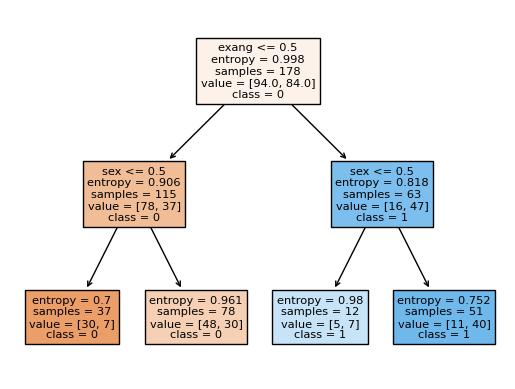

In [24]:
fn = ['sex', 'exang']
cn = ['0', '1']
tree.plot_tree(clf, filled=True, class_names=cn, feature_names=fn)

In [23]:
# следует взять энтропию корня (нулевой уровень) e0 и из нее вычесть сумму взвешенных по количеству сэмплов энтропий ветвей 
# (левой и правой) первого уровня
# вес - доля сэмплов данной(n1,n2) ветви от общего числа на уровне, общее число на уровне равно количеству в корне.

l_node = 0
N = clf.tree_.n_node_samples[l_node]
e0 = clf.tree_.impurity[l_node]

l_node = clf.tree_.children_left[0]
n1 = clf.tree_.n_node_samples[l_node]
e1 = clf.tree_.impurity[l_node]

r_node = clf.tree_.children_right[0]
n2 = clf.tree_.n_node_samples[r_node]
e2 = clf.tree_.impurity[r_node]

IG = e0 - ((n1/N)*e1+(n2/N)*e2)
IG

0.12287285241675627